# Movie Industry Insights: Financial, Popularity, and Rating Analysis

## Introduction

Cinema is shaped by many factors, with directors playing a key role in a film’s success. This project analyzes two Kaggle datasets—movies and directors—to examine how directorial characteristics relate to movie metrics such as budget, revenue, profit, and popularity. By merging these datasets, we identify patterns and insights into the impact of directors on film performance.

### Import libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Movies=pd.read_csv('movies.csv')

In [6]:
Directors=pd.read_csv('directors.csv')

In [7]:
Movies

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [8]:
Directors

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male
...,...,...,...,...
2344,2344,Shane Carruth,7106,Male
2345,2345,Neill Dela Llana,7107,NaN
2346,2346,Scott Smith,7108,NaN
2347,2347,Daniel Hsia,7109,Male


### Merging of Two Datasets

In [9]:
df=pd.merge(Movies,Directors,left_on='director_id',right_on='id',how='left')   #here, movies ile director id and 
df

,Unnamed: 0_x,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,Unnamed: 0_y,director_name,id_y,gender
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,0,James Cameron,4762,Male
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,1,Gore Verbinski,4763,Male
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,2,Sam Mendes,4764,Male
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,3,Christopher Nolan,4765,Male
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,5,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,47,Martin Scorsese,4809,Male
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,607,Kevin Smith,5369,Male
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,386,Uwe Boll,5148,Male
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,773,Richard Linklater,5535,Male


In [10]:
df.drop(columns=['Unnamed: 0_x'],inplace=True)

In [11]:
df.drop(columns=['Unnamed: 0_y'],inplace=True)
df

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male


In [12]:
df.drop(columns=['id_y'],inplace=True)

In [13]:
df.rename(columns={'id_x':'movie_id'},inplace=True)

In [14]:
df

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,Male


In [15]:
df.to_csv('movies_directors.csv',index=False)

In [16]:
df=pd.read_csv('movies_directors.csv')

In [17]:
df

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,Male


## Dataset Overview
The merged dataset contains the following columns:

* movie_id: Unique ID for each movie.
* budget: Budget of the movie.
* popularity: Popularity score of the movie.
* revenue: Revenue generated by the movie.
* title: Title of the movie.
* vote_average: Average user rating (vote) of the movie.
* vote_count: Number of user votes.
* director_id: Unique ID of the director.
* year: Release year of the movie.
* month: Release month of the movie.
* day: Release day of the movie.
* director_name: Name of the director.
* gender: Gender of the director.
* net_profit: Profit made by the movie (Revenue - Budget).
* profit_margin: Profit margin of the movie.

In [18]:
df.size

19045

In [19]:
df.shape

(1465, 13)

In [20]:
df.columns

Index(['movie_id', 'budget', 'popularity', 'revenue', 'title', 'vote_average',
       'vote_count', 'director_id', 'year', 'month', 'day', 'director_name',
       'gender'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   director_id    1465 non-null   int64  
 8   year           1465 non-null   int64  
 9   month          1465 non-null   object 
 10  day            1465 non-null   object 
 11  director_name  1465 non-null   object 
 12  gender         1341 non-null   object 
dtypes: float64(1), int64(7), object(5)
memory usage: 148.9+ KB


In [22]:
df.isnull().sum()

movie_id           0
budget             0
popularity         0
revenue            0
title              0
vote_average       0
vote_count         0
director_id        0
year               0
month              0
day                0
director_name      0
gender           124
dtype: int64

### Information of the Dataset
* Columns = 13
* Rows = 1465
* Data types
    * integer = 7
    * float 1
    * object = 5
* Occur Null values
    * Gender = 124

In [23]:
df['gender'].value_counts()

gender
Male      1309
Female      32
Name: count, dtype: int64

In [24]:
df.describe()

,movie_id,budget,popularity,revenue,vote_average,vote_count,director_id,year
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465.000000,1465.000000,1465.000000,1465.000000
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,6.368191,1146.396587,5040.192491,2002.615017
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,0.818033,1578.077438,258.059631,8.680141
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,3.000000,1.000000,4762.000000,1976.000000
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,5.900000,216.000000,4845.000000,1998.000000
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,6.400000,571.000000,4964.000000,2004.000000
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,6.900000,1387.000000,5179.000000,2009.000000
max,48395.000000,3.800000e+08,724.000000,2.787965e+09,8.300000,13752.000000,6204.000000,2016.000000


In [25]:
df[df['gender'].isnull()]

,movie_id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,gender
17,43620,180000000,42,372234864,The Golden Compass,5.8,1303,4780,2007,Dec,Tuesday,Chris Weitz,NaN
38,43653,185000000,65,343471816,Star Trek Beyond,6.6,2568,4802,2016,Jul,Thursday,Justin Lin,NaN
50,43669,175000000,90,745000000,Suicide Squad,5.9,7458,4811,2016,Aug,Tuesday,David Ayer,NaN
53,43672,175000000,44,264218220,Waterworld,5.9,992,4814,1995,Jul,Friday,Kevin Reynolds,NaN
81,43729,150000000,44,301000000,Wrath of the Titans,5.5,1431,4849,2012,Mar,Tuesday,Jonathan Liebesman,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,48135,0,0,0,Finishing The Game,4.9,8,4802,2007,Jan,Sunday,Justin Lin,NaN
1442,48185,860000,3,2451545,My Beautiful Laundrette,6.6,51,5249,1985,Sep,Saturday,Stephen Frears,NaN
1447,48231,0,3,0,Better Luck Tomorrow,6.5,27,4802,2002,Jan,Saturday,Justin Lin,NaN
1449,48244,250000,6,56825,The Canyons,4.1,75,5970,2013,Jul,Monday,Paul Schrader,NaN


### Fill Null Values

In [26]:
df['gender']=df['gender'].fillna('Male')

In [13]:
df.columns

Index(['movie_id', 'budget', 'popularity', 'revenue', 'title', 'vote_average',
       'vote_count', 'director_id', 'year', 'month', 'day', 'director_name',
       'gender'],
      dtype='object')

In [50]:
color_main = "#1F3B73"
gender_palette = {
    "Male": "#1F3B73",
    "Female": "#2AA198",
    "Other": "#C77CFF"}
month_palette = [
    "#1F3B73", "#2A5783", "#3D708B", "#519894",
    "#63B49E", "#78CFA7", "#8DEAB1", "#A4F4C2",
    "#BCEFD8", "#D4E9F0", "#AED0FF", "#7BA5FF"]

### Budget vs Revenue

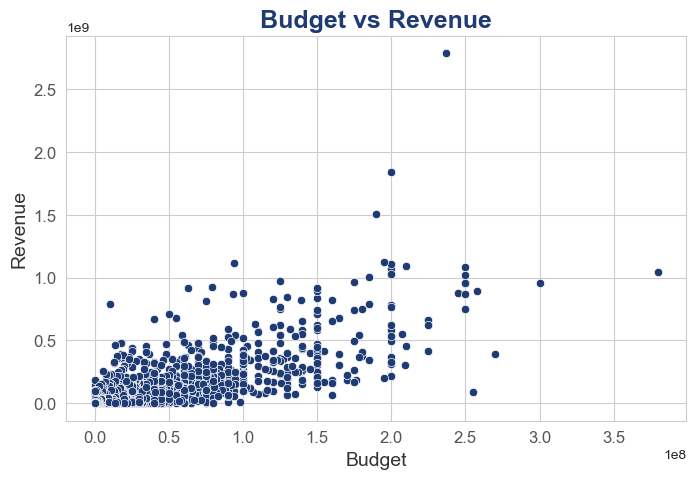

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="budget", y="revenue", color=color_main)

plt.title("Budget vs Revenue", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Budget", fontsize=14, color='#333333')
plt.ylabel("Revenue", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

* Higher budgets generally lead to higher revenues, but the relationship is weak and scattered.
* Most films cluster under $100\text{M}$ budget and $500\text{M}$ revenue.
* There are a few blockbuster outliers with extremely high revenue.
* High-budget films are risky—some earn far less than expected.

### Revenue distribution by Director Gender


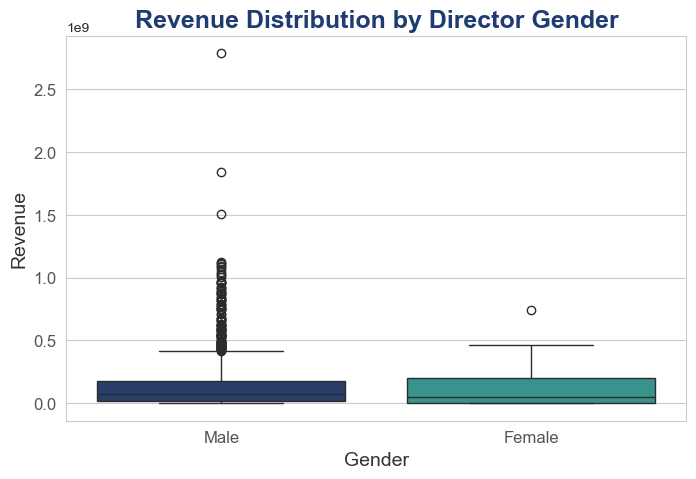

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="gender", y="revenue", palette=gender_palette)

plt.title("Revenue Distribution by Director Gender",
          fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Gender", fontsize=14, color='#333333')
plt.ylabel("Revenue", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

* Revenue distributions for male- and female-directed films are broadly similar.
* Male-directed films show more extreme high-revenue outliers.
* Median revenues appear close between the two groups.
* Female-directed films have fewer extreme highs, with a more concentrated mid-range distribution.

### Yearly Revenue Trend

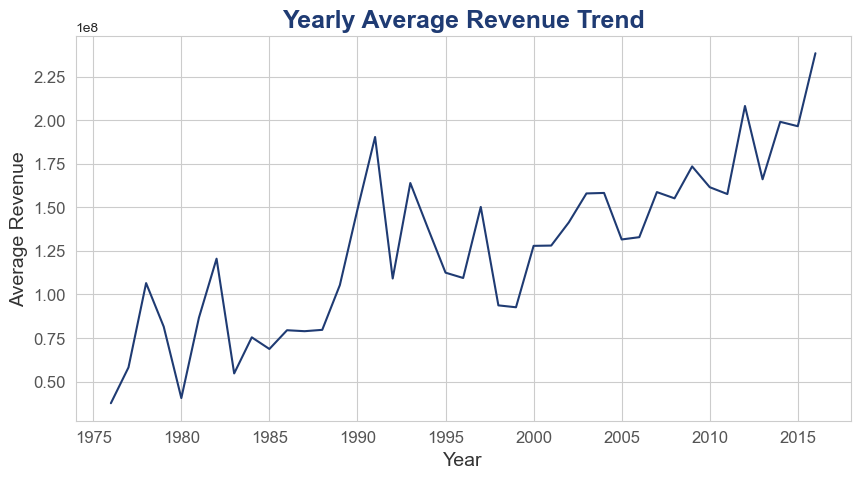

In [52]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("year")["revenue"].mean().reset_index(),
             x="year", y="revenue", color=color_main)

plt.title("Yearly Average Revenue Trend", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Year", fontsize=14, color='#333333')
plt.ylabel("Average Revenue", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

* Average movie revenue shows a clear upward trend from the late 1970s to 2017.
* Revenues fluctuate year to year but rise sharply around the late 1980s and early 1990s.
* After 2000, the average revenue continues increasing with periodic dips.
* The highest average revenues occur in the most recent years, indicating long-term industry growth.

### Popularity vs Net Profit

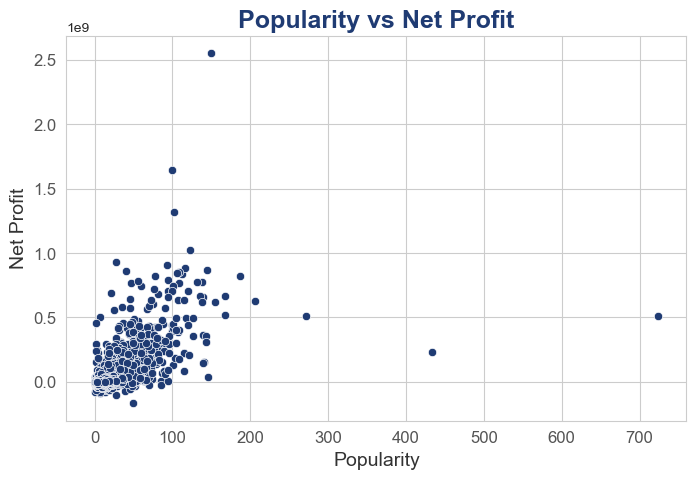

In [53]:
df['net_profit']=df['revenue']-df['budget']

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="popularity", y="net_profit", color=color_main)

plt.title("Popularity vs Net Profit", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Popularity", fontsize=14, color='#333333')
plt.ylabel("Net Profit", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()


- No strong correlation between popularity and net profit.
- Most movies cluster at low–moderate popularity (20–120) and net profit ($0–$400M).
- Several outliers: some films have very high profit but only moderate popularity, and a few have very high popularity with modest profit.
- Popularity alone does not reliably predict financial success; other factors (budget, franchise strength, marketing) likely drive profit variabilty.


### Profit Margin Distribution

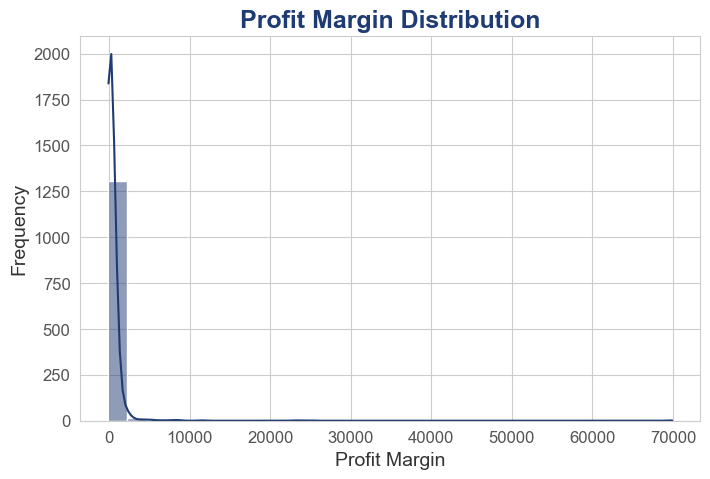

In [54]:
df['profit_margin']=df['net_profit']/df['budget']*100

plt.figure(figsize=(8,5))
sns.histplot(df["profit_margin"], kde=True, bins=30, color=color_main)

plt.title("Profit Margin Distribution", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Profit Margin", fontsize=14, color='#333333')
plt.ylabel("Frequency", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- Profit margins are **highly skewed**, with most films concentrated near very low margins.
- A small number of extreme outliers stretch the distribution far to the right (up to ~70,000).
- The sharp left-heavy peak indicates that **most movies earn modest profits relative to budget**.
- The long tail suggests that **only a few films achieve exceptionally high profit margins**.

### Profit margin by Release Month

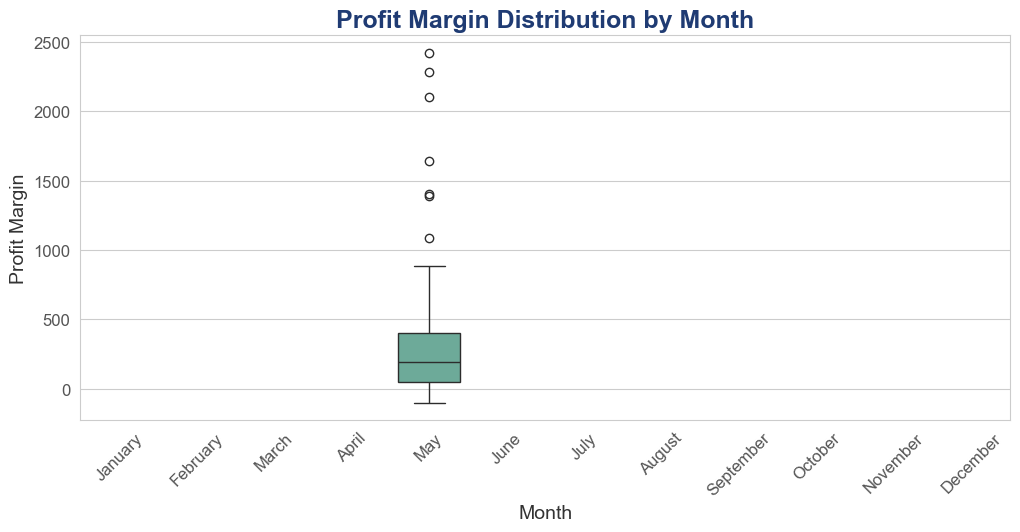

In [64]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="month", y="profit_margin", palette=month_palette,
            order=["January","February","March","April","May","June",
                   "July","August","September","October","November","December"])

plt.title("Profit Margin Distribution by Month",
          fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Month", fontsize=14, color='#333333')
plt.ylabel("Profit Margin", fontsize=14, color='#333333')
plt.xticks(rotation=45, fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- Only **May** shows enough data for a meaningful profit-margin distribution; other months appear empty or underrepresented.
- May’s distribution is **right-skewed**, with many low-to-moderate profit margins and several **large outliers** reaching above 2,000.
- The interquartile range suggests typical May releases achieve **modest profit margins**, while a few films perform exceptionally well.

### Votes vs Revenue

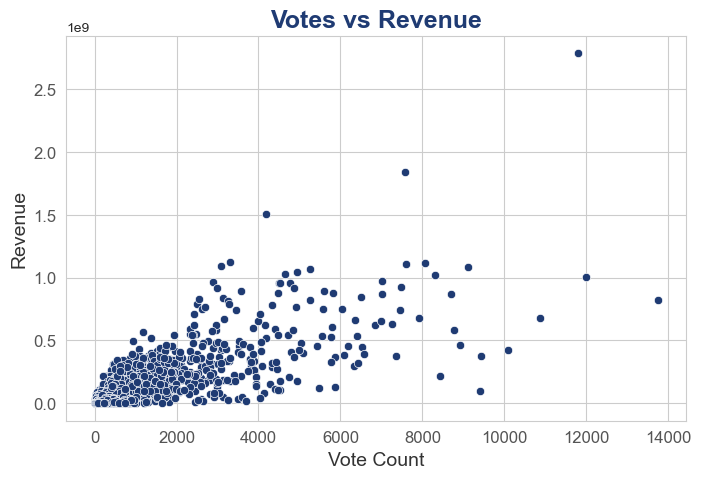

In [55]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="vote_count", y="revenue", color=color_main)

plt.title("Votes vs Revenue", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Vote Count", fontsize=14, color='#333333')
plt.ylabel("Revenue", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- There is a **positive but weak correlation** between vote count and revenue.  
- Most movies fall between **0–4000 votes** and **$0–$300M** revenue.  
- A few **blockbusters** stand out with very high votes and revenue.  
- Movies with similar vote counts can still have **widely varying revenues**.

### Yearly Net Profit Trend

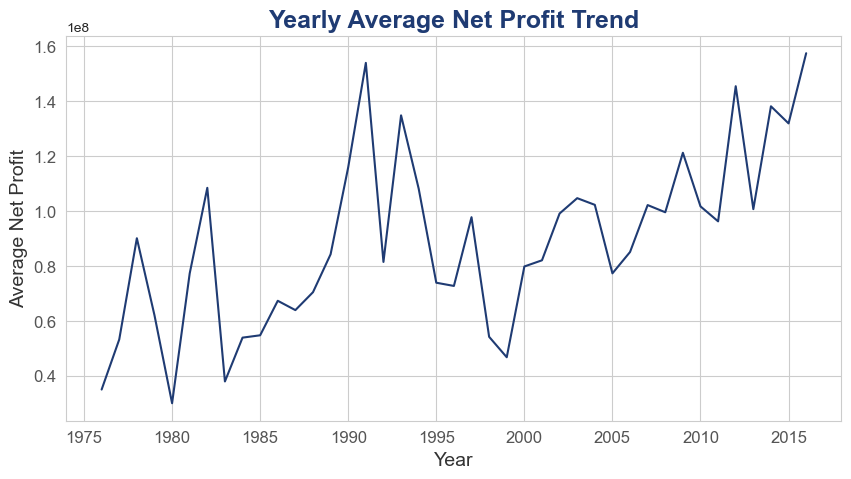

In [56]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("year")["net_profit"].mean().reset_index(),
             x="year", y="net_profit", color=color_main)

plt.title("Yearly Average Net Profit Trend", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Year", fontsize=14, color='#333333')
plt.ylabel("Average Net Profit", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- Average net profit shows an **overall upward trend** from the late 1970s to 2016.  
- Profit levels **fluctuate sharply** year to year, indicating variability in film performance.  
- Peaks occur around the **early 1990s**, **late 2000s**, and **mid-2010s**, suggesting strong industry periods.  
- Despite volatility, the long-term pattern reflects **growing profitability** over time.

### Month-wise Average Profit

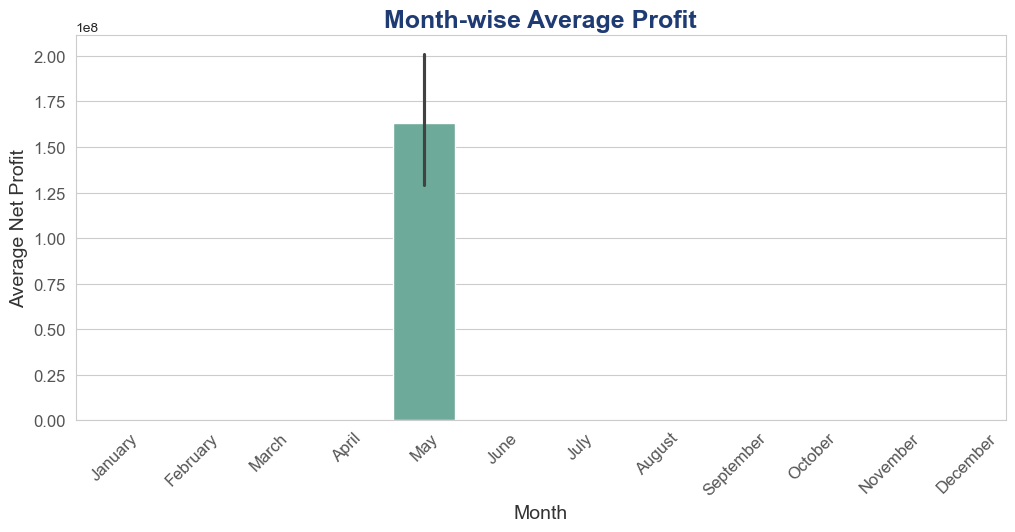

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="month", y="net_profit", estimator="mean",
    palette=month_palette,
    order=["January","February","March","April","May","June",
           "July","August","September","October","November","December"])

plt.title("Month-wise Average Profit", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Month", fontsize=14, color='#333333')
plt.ylabel("Average Net Profit", fontsize=14, color='#333333')
plt.xticks(rotation=45, fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- **May** has the highest average net profit by a wide margin compared to all other months.  
- Other months show **negligible or no visible average profit**, indicating far fewer profitable releases or lower earnings.  
- The error bar suggests **some variability** in May’s profits, but it remains the dominant month for strong financial performance.

### Director Gender Distribution

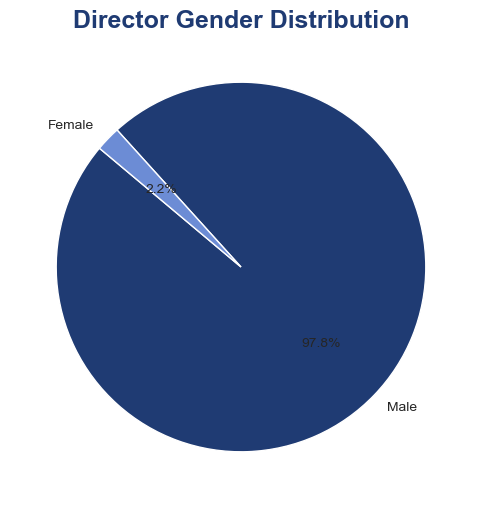

In [67]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=[color_main, "#6C8CD5", "#AAB8E8"])

plt.title("Director Gender Distribution",
          fontsize=18, color=color_main, fontweight='bold')
plt.show()

- The distribution of film directors shown in the chart is heavily male-dominated.  
- Male directors make up approximately **97.8%** of the total.  
- Female directors represent only about **2.2%** of the total.  
- This indicates a significant gender imbalance, with women being severely underrepresented in the director role within the dataset.

### Revenue Distribution

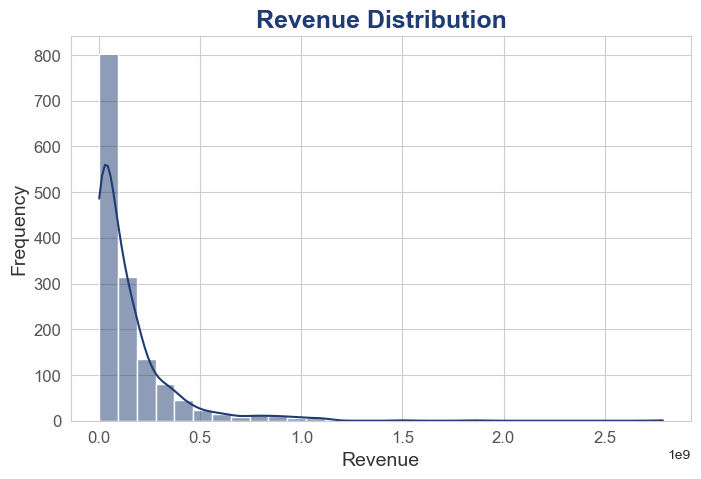

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(df["revenue"], kde=True, bins=30, color=color_main)

plt.title("Revenue Distribution", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Revenue", fontsize=14, color='#333333')
plt.ylabel("Frequency", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- The revenue distribution is **highly right-skewed**, with most films earning low revenue.  
- Only a few films achieve **very high revenues**, creating a long right tail


### Budget Distribution

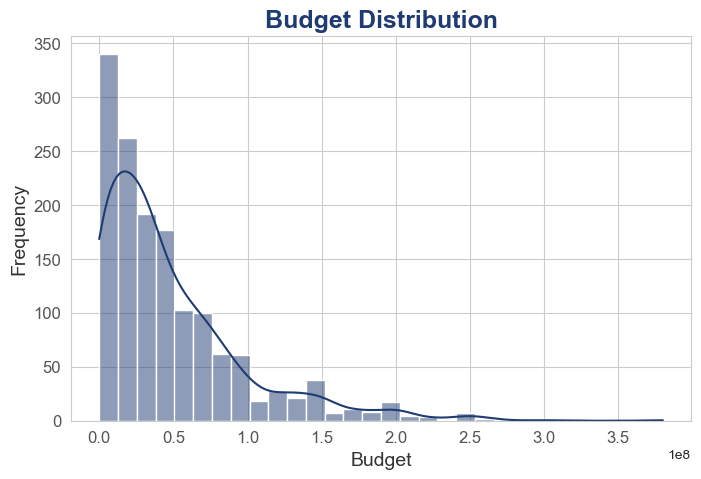

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df["budget"], kde=True, bins=30, color=color_main)

plt.title("Budget Distribution", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Budget", fontsize=14, color='#333333')
plt.ylabel("Frequency", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- The budget distribution is **right-skewed**, with most films having low to moderate budgets.  
- Only a smaller number of films have **very high budgets**, creating a long right tail.  
- Most films fall below the **$100 million** budget range, indicating that high-budget productions are relatively rar.


### Average Vote by Year

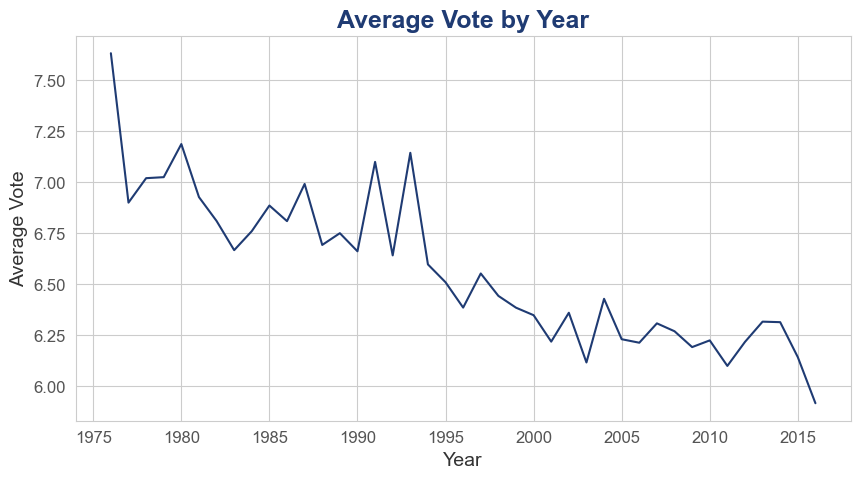

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("year")["vote_average"].mean().reset_index(),
             x="year", y="vote_average", color=color_main)

plt.title("Average Vote by Year", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Year", fontsize=14, color='#333333')
plt.ylabel("Average Vote", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- Average movie ratings show a **steady decline** from the late 1970s (~7.5) to 2015 (~6.0).  
- The 1980s and early 1990s exhibit **minor fluctuations**, but the overall trend continues downward.  
- After 2000, the decline becomes **more consistent**, with fewer high-rating peaks.  
- Overall, movies tend to be **rated lower over time**, possibly due to more releases or changing audience rating behavior.

### Popularity Distribution

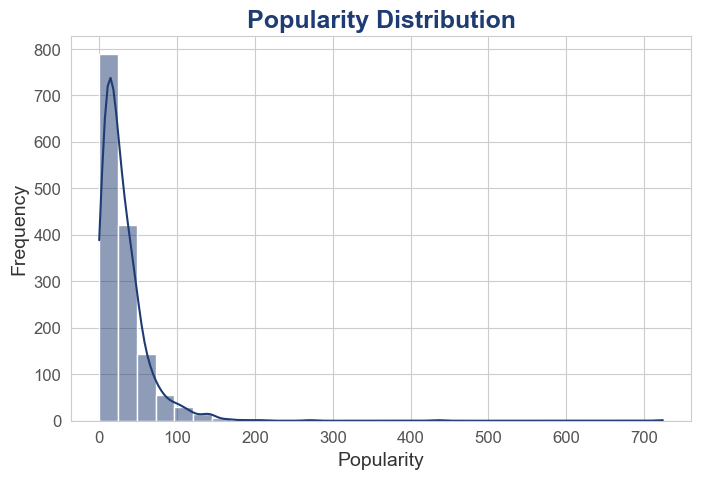

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df["popularity"], kde=True, bins=30, color=color_main)

plt.title("Popularity Distribution", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Popularity", fontsize=14, color='#333333')
plt.ylabel("Frequency", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- Popularity is **highly right-skewed**, with most movies clustered at low popularity values.  
- The majority fall roughly between **0 and 50**, with a sharp drop-off after that.  
- A small number of movies reach **very high popularity** (100+), but these are rare outliers.  
- This suggests that only a few films gain significant attention, while most remain relatively obscure.

### Revenue vs Vote Average

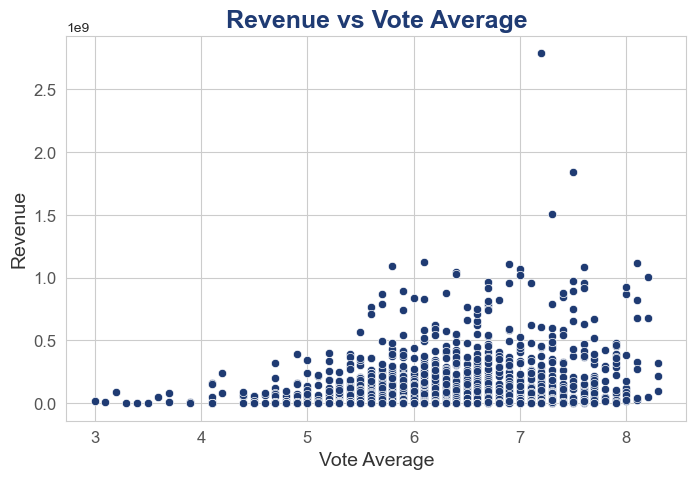

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="vote_average", y="revenue", color=color_main)

plt.title("Revenue vs Vote Average", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Vote Average", fontsize=14, color='#333333')
plt.ylabel("Revenue", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- There is **no strong linear relationship** between vote average and revenue.  
- Movies with **higher ratings (6–8)** tend to show **greater variability** in revenue, including the highest-grossing outliers.  
- Lower-rated movies (below ~5) almost always have **low revenue**, suggesting that very low-rated films rarely perform well financially.  
- Overall, high ratings **increase the chance** of higher revenue, but do not guarantee it—revenue is influenced by many other factors (budget, marketing, franchise status, etc.).

### Budget vs Profit Margin

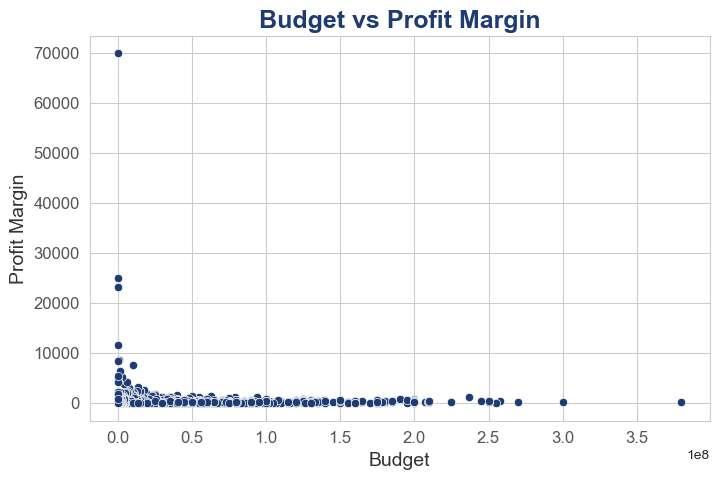

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="budget", y="profit_margin", color=color_main)

plt.title("Budget vs Profit Margin", fontsize=18, color=color_main, fontweight='bold')
plt.xlabel("Budget", fontsize=14, color='#333333')
plt.ylabel("Profit Margin", fontsize=14, color='#333333')
plt.xticks(fontsize=12, color='#555555')
plt.yticks(fontsize=12, color='#555555')

plt.show()

- No strong correlation between budget and profit margin.
- Low-budget films show wide variability, from losses to extremely high profits.
- High-budget films tend to have low, stable profit margins.
- The highest profit margins come from a few low-budget breakout hits.

### Correlation Matrix (Financial Features)

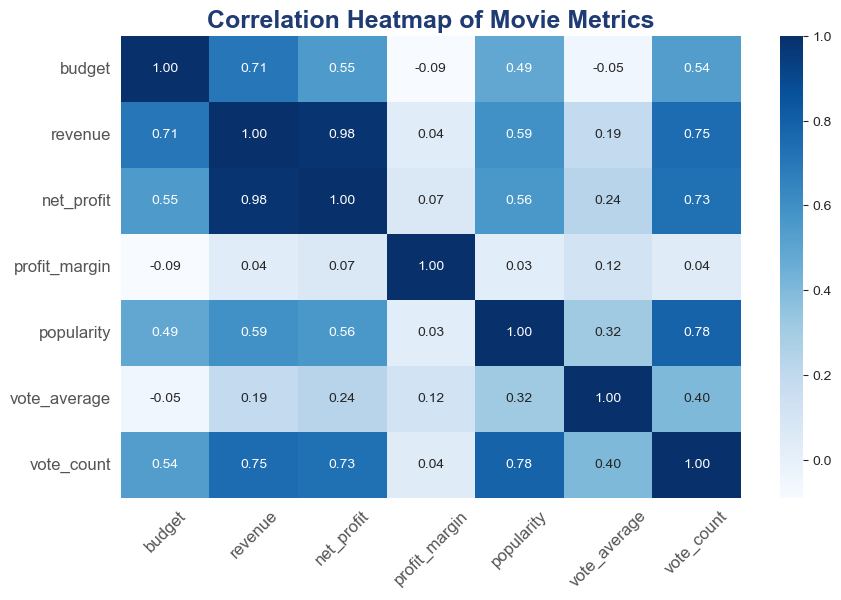

In [68]:
plt.figure(figsize=(10,6))

corr = df[["budget", "revenue", "net_profit", "profit_margin",
           "popularity", "vote_average", "vote_count"]].corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")

plt.title("Correlation Heatmap of Movie Metrics",
          fontsize=18, color=color_main, fontweight='bold')
plt.xticks(fontsize=12, color='#555555', rotation=45)
plt.yticks(fontsize=12, color='#555555')

plt.show()

- **Revenue, net profit, and vote_count** are strongly positively correlated.
- **Budget** correlates well with **revenue** and **net profit**, but **not** with profit margin.
- **Profit margin** has very weak correlations with all other variables.
- **Popularity** is strongly correlated with **vote_count** and moderately with revenue-related metrics.
- **Vote_average** shows only weak-to-moderate correlations across the board.

### Movie Count by Month

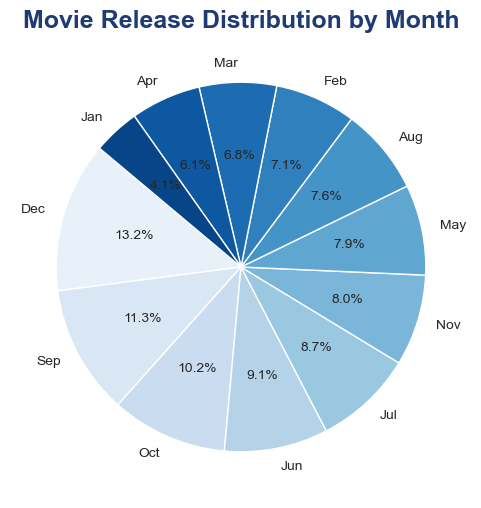

In [70]:
month_counts = df["month"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(month_counts,
        labels=month_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("Blues", n_colors=len(month_counts)))

plt.title("Movie Release Distribution by Month",
          fontsize=18, color=color_main, fontweight='bold')
plt.show()

- **December** has the highest share of releases (13.2%), followed by **September** (11.3%) and **October** (10.2%).
- Releases gradually increase from **January** through late summer, peaking in fall and early winter.
- **January** has the fewest releases (4.1%), with **April** and **March** also relatively low.
- Overall, studios tend to release more films in the **fall and winter months** than in early spring.

## Overall Insights

- **Budget vs Revenue:** Higher budgets often lead to higher revenues, but many films perform modestly; a few blockbusters and low-budget hits drive extreme outcomes.  
- **Profit Margins:** Highly skewed; most movies earn modest returns, while a few achieve exceptionally high profit margins.  
- **Audience Engagement:** Popularity and ratings weakly correlate with financial success; other factors like budget, marketing, and franchise strength are more influential.  
- **Temporal Trends:** Average revenue and net profit have grown over decades, with peaks in the early 1990s, late 2000s, and mid-2010s.  
- **Seasonality:** Most films release in fall and winter, particularly December; early-year releases are fewer.  
- **Director Gender:** Heavily male-dominated (~97.8%); median revenues are similar across genders, though male-directed films show more extreme high-revenue outliers.  
- **Correlations:** Revenue, net profit, and vote count are strongly linked; profit margin shows weak correlation with other metrics.  
- **Key Takeaway:** Movie success is multi-factorial, with high-risk, high-reward outcomes concentrated in a small number of films.


## Key Recommendations

- **Strategic Budgeting:** Balance investment risk; low- to mid-budget films can deliver high profit, while blockbusters carry higher risk.  
- **Optimize Release Timing:** Focus on peak months like May, September, and December to maximize revenue.  
- **Enhance Marketing & Franchise Strategy:** Popularity and ratings alone don’t ensure success; strong marketing and franchise potential matter.  
- **Promote Diversity:** Encourage more female and underrepresented directors, as gender does not hinder revenue and may broaden audience reach.
